In [1]:
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [30]:
X, y = make_blobs(centers=2, random_state=0)

In [31]:
y.shape

(100,)

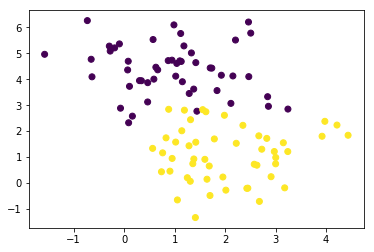

In [32]:
plt.scatter(X[:, 0], X[:, 1], c= y)

In [55]:
class CustomLogisticRegression:
    
    def __init__(self, lr=0.01, iters=20):
        self.__lr = lr
        self.__iters = iters
    
    def fit(self, X, y):
        
        self.__y = y.reshape(-1, 1)
        X_mod = np.hstack([np.ones([len(X), 1]), X])
        self.__X = X_mod
        
        self.__theta = np.zeros([X_mod.shape[1], 1])
        
        err = []
        for i in range(self.__iters):
            err.append(self.error())
            self.gradient_accend()
            
        self.theta_ = self.__theta 
            
        return err
        
    def gradient_accend(self):
        delta_theta = self.gradient()
        self.__theta -= delta_theta
        
    def gradient(self):
        yh = self.hypothesis(self.__X)
        diff = (yh - self.__y)
        
        return np.dot(self.__X.T, diff) * self.__lr
        
    def hypothesis(self, X):
        prod = np.dot(X, self.__theta)
        return 1 / (1 + np.exp(-prod))
        
    def error(self):
        yh = self.hypothesis(self.__X)
        ya = self.__y
        ll = ya*np.log(yh) + (1-ya)*np.log(1-yh)
        return -np.mean(ll)
    
    def predict(self, X):
        X_mod = np.hstack([np.ones([len(X), 1]), X])
        yh = self.hypothesis(X_mod)
        
        return (yh > .5).astype(int).flatten()
    
    def score(self, X, y):
        yp = self.predict(X)
        return np.mean(yp == y)
    
    def confusion_matrix(self, X, y):
        yp = self.predict(X)
        
        tp = np.mean((y==1) & (yp==1))
        tn = np.mean((y==0) & (yp==0))
        fp = np.mean((y==0) & (yp==1))
        fn = np.mean((y==1) & (yp==0))
        
        return np.array([[tp, fp], [fn, tn]])
        
        

In [56]:
model = CustomLogisticRegression()

In [57]:
err = model.fit(X, y)

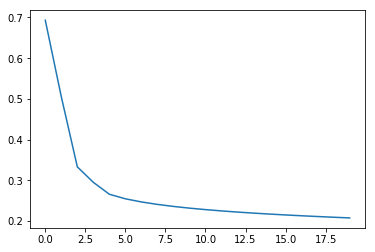

In [58]:
plt.plot(err)

In [59]:
model.theta_

array([[ 1.03887752],
       [ 1.34366726],
       [-1.29079066]])

In [60]:
model.predict(X[:10])

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1])

In [61]:
y[:10]

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1])

In [62]:
model.score(X, y)

0.9

In [63]:
model.confusion_matrix(X, y)

array([[0.43, 0.03],
       [0.07, 0.47]])

In [64]:
a = np.arange(20)

In [65]:
a%5==0

array([ True, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False])

In [66]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y, model.predict(X))

array([[47,  3],
       [ 7, 43]])